## Data Wrangling

Data wrangling, also known as data munging, is the process of transforming and mapping raw data into a more useful format for analysis. This process typically involves several steps, including:

1. **Data Collection**: Gathering data from various sources, such as databases, APIs, or flat files.
2. **Data Cleaning**: Identifying and correcting errors or inconsistencies in the data. This may involve handling missing values, removing duplicates, and correcting data types.
3. **Data Transformation**: Modifying the data to fit the requirements of the analysis. This can include normalizing data, aggregating data, and creating new calculated fields.
4. **Data Integration**: Combining data from different sources to create a unified dataset. This may involve merging datasets, joining tables, and aligning data formats.
5. **Data Reduction**: Reducing the volume of data to make it more manageable. This can include filtering out irrelevant data, sampling data, and dimensionality reduction.

The goal of data wrangling is to ensure that the data is accurate, consistent, and ready for analysis. By performing these steps, we can improve the quality of the data and make it easier to extract meaningful insights.


# Used Cars Data Analysis

In this notebook, we will analyze the used cars dataset from the UCI Machine Learning Repository. The dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Importing Libraries

First, we need to import the necessary libraries.


In [198]:
import pandas as pd
import numpy as np

### Load DataSet

In [199]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
df = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataframe
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning

In this section, we performed several data cleaning steps to prepare the dataset for analysis. Here are the steps we took and the reasons behind them:

1. **Replace '?' with NaN**:
    - **Reason**: The dataset contains missing values represented by the character '?'. To handle these missing values properly, we replaced '?' with `NaN` (Not a Number), which is the standard missing value marker used in pandas.
    - **Benefit**: This allows us to use pandas' built-in functions to handle missing data more effectively.

2. **Convert Columns to Appropriate Data Types**:
    - **Reason**: Some columns that should be numeric are currently stored as objects (strings). We converted these columns to their appropriate numeric data types.
    - **Columns Converted**: `normalized_losses`, `bore`, `stroke`, `horsepower`, `peak_rpm`, and `price`.
    - **Benefit**: Converting these columns to numeric types allows us to perform mathematical operations and statistical analyses on them.

3. **Drop Rows with Missing Values**:
    - **Reason**: After converting the columns, some rows still contain `NaN` values. We decided to drop these rows to ensure that our analysis is based on complete data.
    - **Benefit**: This helps in avoiding errors and inaccuracies in our analysis due to missing values.

By performing these data cleaning steps, we ensure that our dataset is in a suitable format for further analysis. This will help us in generating accurate insights and making reliable conclusions from the data.

In [200]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to appropriate data types
df['normalized_losses'] = pd.to_numeric(df['normalized_losses'])
df['bore'] = pd.to_numeric(df['bore'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'])
df['price'] = pd.to_numeric(df['price'])

# Drop rows with missing values
df1 = df.dropna()

# Display the first few rows of the cleaned dataframe
df1.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


#### Difference between uncleaned and cleaned data

In [201]:
print("Uncleaned data distribution and statistics:")
print(df.describe())
print("Cleaned data distribution and statistics:")
print(df1.describe())

Uncleaned data distribution and statistics:
        symboling  normalized_losses  wheel_base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb_weight  engine_size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539   

### Export Cleaned Data

In this section, we will export the cleaned dataframe `df1` to a CSV file. This will allow us to save the cleaned data for future use and share it with others easily. Exporting the data to a CSV file ensures that our data cleaning efforts are preserved and can be utilized in other projects or analyses.

In [202]:
# Export the cleaned dataframe to a CSV file
df1.to_csv('cleaned_used_cars.csv', index=False)

### Count missing values in each colunn

In [203]:
missing_data = df1.isnull()
missing_data.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [204]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
symboling
False    159
Name: count, dtype: int64

normalized_losses
normalized_losses
False    159
Name: count, dtype: int64

make
make
False    159
Name: count, dtype: int64

fuel_type
fuel_type
False    159
Name: count, dtype: int64

aspiration
aspiration
False    159
Name: count, dtype: int64

num_doors
num_doors
False    159
Name: count, dtype: int64

body_style
body_style
False    159
Name: count, dtype: int64

drive_wheels
drive_wheels
False    159
Name: count, dtype: int64

engine_location
engine_location
False    159
Name: count, dtype: int64

wheel_base
wheel_base
False    159
Name: count, dtype: int64

length
length
False    159
Name: count, dtype: int64

width
width
False    159
Name: count, dtype: int64

height
height
False    159
Name: count, dtype: int64

curb_weight
curb_weight
False    159
Name: count, dtype: int64

engine_type
engine_type
False    159
Name: count, dtype: int64

num_cylinders
num_cylinders
False    159
Name: count, dtype: int64

engine_size
en

### Calculate the mean value for normalized losses and replace "NaN" with mean value

In [205]:
# Calculate the mean value for normalized losses
avg_norm_loss = df['normalized_losses'].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

# Replace NaN values with the mean value
df.fillna({'normalized_losses': avg_norm_loss}, inplace=True)

Average of normalized-losses: 122.0


### Calculate the mean value for bore and replace "NaN" with mean value

In [206]:
# Calculate the mean value for bore
avg_bore = df['bore'].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)

# Replace NaN values with the mean value
df.fillna({'bore': avg_bore}, inplace=True)

Average of bore: 3.3297512437810943


### Calculate the mean value for Stroke and replace "NaN" with mean value

In [207]:
# Calculate the mean value for stroke
avg_stroke = df['stroke'].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

# Replace NaN values with the mean value
df.fillna({'stroke': avg_stroke}, inplace=True)

Average of stroke: 3.255422885572139


### Calculate the mean value for Horsepower and replace "NaN" with mean value

In [208]:

# Calculate the mean value for horsepower
avg_horsepower = df['horsepower'].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)

# Replace NaN values with the mean value
df.fillna({'horsepower': avg_horsepower}, inplace=True)

Average of horsepower: 104.25615763546799


### Calculate the mean value for peak-rpm and replace "NaN" with mean value

In [209]:

# Calculate the mean value for peak-rpm
avg_peak_rpm = df['peak_rpm'].astype("float").mean(axis=0)
print("Average of peak-rpm:", avg_peak_rpm)

# Replace NaN values with the mean value
df.fillna({'peak_rpm': avg_peak_rpm}, inplace=True)

Average of peak-rpm: 5125.369458128079


In [210]:
df['num_doors'].value_counts()

num_doors
four    114
two      89
Name: count, dtype: int64

In [211]:
num_doors_top = df['num_doors'].value_counts().idxmax()

In [212]:
# Replace NaN values with the max value
df.fillna({'num_doors': num_doors_top}, inplace=True)

Finally, Drop rows that do not have price

In [213]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [214]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [215]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### Convert data types to proper format

In [216]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized_losses"]] = df[["normalized_losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak_rpm"]] = df[["peak_rpm"]].astype("float")

### Data Normalization

Data normalization is a crucial preprocessing step in data analysis and machine learning. It involves scaling the data to a standard range without distorting differences in the ranges of values. This process ensures that each feature contributes equally to the analysis and helps improve the performance of machine learning algorithms.

In this section, we will normalize the numerical features in our dataset. The common methods for normalization include:

1. **Min-Max Normalization**:
    - **Formula**: \( X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} \)
    - **Range**: [0, 1]
    - **Use Case**: When the data does not contain outliers and you want to scale the features to a specific range.

2. **Z-Score Normalization (Standardization)**:
    - **Formula**: \( X_{norm} = \frac{X - \mu}{\sigma} \)
    - **Range**: Centered around 0 with a standard deviation of 1
    - **Use Case**: When the data contains outliers or you want to scale the features to have a mean of 0 and a standard deviation of 1.

By normalizing the data, we ensure that the numerical features are on a similar scale, which can lead to better performance and faster convergence of machine learning algorithms.

### Approach 1: replace the original value by max value

i.e original_value / maximum_value

In [217]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [218]:
df['height'] = df['height']/df['height'].max()

In [219]:
df[['height', 'width', 'length']].head()

,height,width,length
0,0.816054,0.890278,0.811148
1,0.816054,0.890278,0.811148
2,0.876254,0.909722,0.822681
3,0.908027,0.919444,0.848630
4,0.908027,0.922222,0.848630


### Binning

Binning, also known as discretization, is a data preprocessing technique used in data wrangling to transform continuous data into discrete bins or intervals. This process involves dividing the range of continuous data into a series of intervals and then assigning each data point to one of these intervals. Binning can be particularly useful in various data analysis and machine learning tasks for several reasons:

1. **Handling Outliers**:
    - **Reason**: Continuous data often contains outliers that can skew the analysis and affect the performance of machine learning models.
    - **Benefit**: Binning helps to smooth out the effect of outliers by grouping them into bins, making the data more robust to extreme values.

2. **Reducing Noise**:
    - **Reason**: Continuous data can be noisy, with small fluctuations that do not carry significant information.
    - **Benefit**: Binning reduces noise by aggregating data points into bins, which can help in identifying underlying patterns and trends.

3. **Improving Model Performance**:
    - **Reason**: Some machine learning algorithms, such as decision trees, can perform better with discrete data.
    - **Benefit**: Binning can improve the performance of these algorithms by converting continuous features into categorical ones.

4. **Enhancing Interpretability**:
    - **Reason**: Continuous data can be difficult to interpret, especially when dealing with large ranges or complex distributions.
    - **Benefit**: Binning simplifies the data by converting it into discrete categories, making it easier to understand and interpret.

5. **Creating Features**:
    - **Reason**: Binning can be used to create new features that capture important information about the distribution of the data.
    - **Benefit**: These new features can enhance the predictive power of machine learning models by providing additional insights.

### Types of Binning

1. **Equal-Width Binning**:
    - **Description**: Divides the range of data into intervals of equal width.
    - **Use Case**: Useful when the data is uniformly distributed.

2. **Equal-Frequency Binning**:
    - **Description**: Divides the data into intervals that contain approximately the same number of data points.
    - **Use Case**: Useful when the data is skewed or has varying densities.

3. **Custom Binning**:
    - **Description**: Allows the user to define custom intervals based on domain knowledge or specific requirements.
    - **Use Case**: Useful when specific intervals are needed to capture important patterns or business rules.

By applying binning, we can transform continuous data into a more manageable and interpretable format, which can enhance the quality of our analysis and improve the performance of machine learning models.

In [220]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

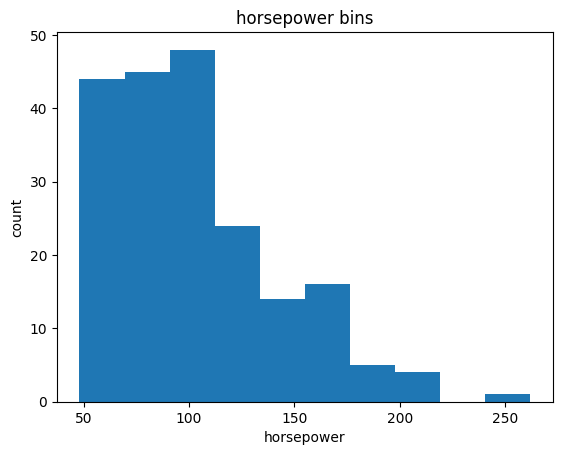

In [221]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [222]:
# Define bin edges
# The linspace function is part of the NumPy library in Python. It generates an array of evenly spaced numbers over a specified range.
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

# Create bin labels
bin_labels = ['Low', 'Medium', 'High']

# Bin the horsepower values
df['horsepower_binned'] = pd.cut(df['horsepower'], bins=bins, labels=bin_labels, include_lowest=True)

# Display the first few rows of the dataframe with the new binned column
df[['horsepower', 'horsepower_binned']].head(20)

,horsepower,horsepower_binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [223]:
df["horsepower_binned"].value_counts()

horsepower_binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

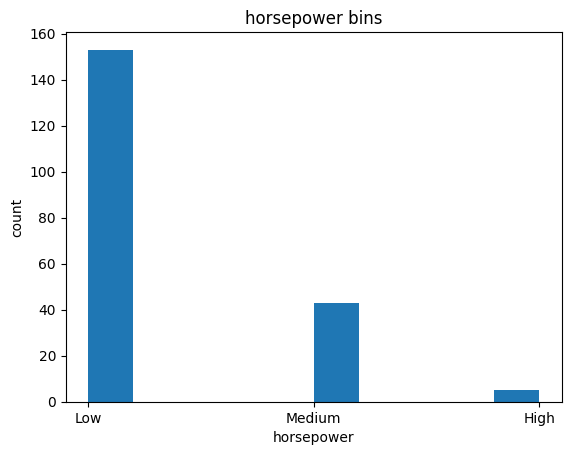

In [224]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower_binned"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator Variable (Dummy Variable)

An indicator variable, also known as a dummy variable, is a numerical variable used in regression analysis to represent subgroups of the sample in your study. It is used to convert categorical data into a numerical format that can be used in statistical models. 

For example, if you have a categorical variable "fuel_type" with two categories "gas" and "diesel", you can create two dummy variables:

- `fuel_type_gas`: 1 if the fuel type is gas, 0 otherwise
- `fuel_type_diesel`: 1 if the fuel type is diesel, 0 otherwise

This allows you to include categorical data in your regression models by representing them as binary variables.

In [225]:
dummy_variable_1 = pd.get_dummies(df['fuel_type'])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [226]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [227]:
df = pd.concat([df, dummy_variable_1], axis=1)

df.drop("fuel_type", axis=1, inplace=True)

In [228]:
df.head()

,symboling,normalized_losses,make,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,horsepower_binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,False,True


### Correlation between values

In [229]:
df[['bore','stroke', 'compression_ratio', 'horsepower']].corr()

,bore,stroke,compression_ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression_ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


### Positive Linear Relationship

(0.0, 53448.611061589814)

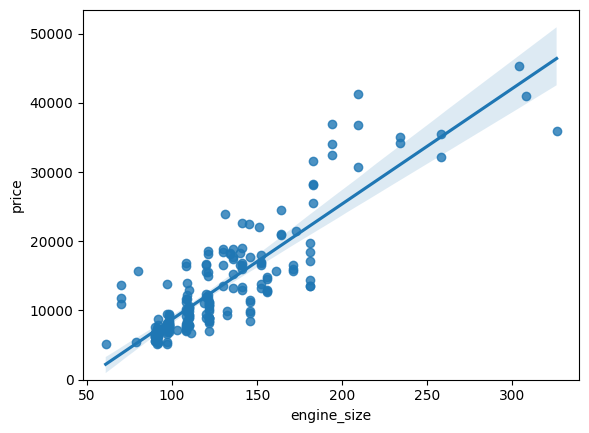

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = 'engine_size', y = 'price', data = df)
plt.ylim(0,)

### Correlation between engine_size and price - Positive Linear Relationship

In [231]:
df[['engine_size', 'price']].corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='engine_size', ylabel='price'>

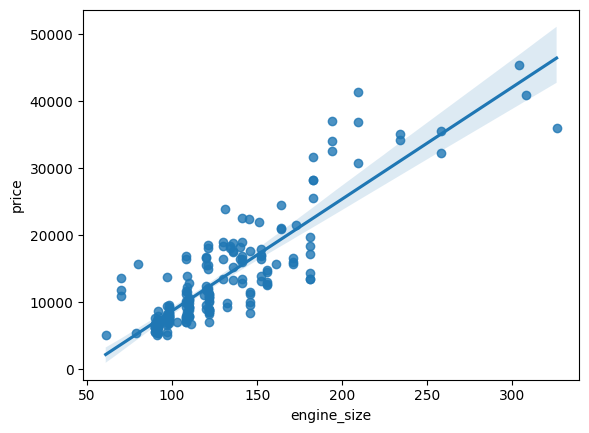

In [232]:
sns.regplot(x = 'engine_size', y ='price', data = df)

### Correlation between highway_mpg and price - Negative Linear Relationship

In [233]:
df[['highway_mpg', 'price']].corr()

,highway_mpg,price
highway_mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='highway_mpg', ylabel='price'>

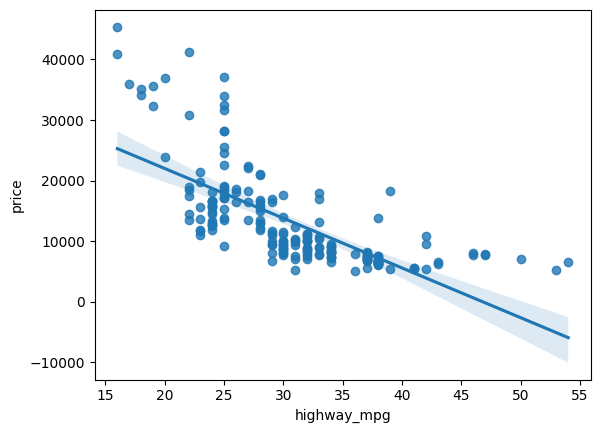

In [234]:
sns.regplot(x = 'highway_mpg', y ='price', data = df)

### Correlation between peak_rpm and price - Weak Linear Relationship

In [235]:
df[['peak_rpm', 'price']].corr()

,peak_rpm,price
peak_rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='peak_rpm', ylabel='price'>

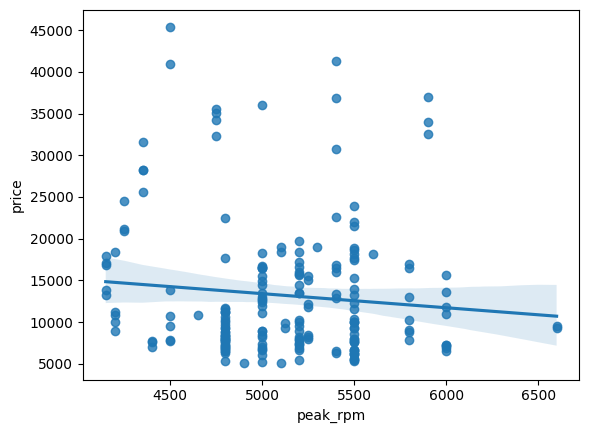

In [236]:
sns.regplot(x = 'peak_rpm', y ='price', data = df)

### Categorical Relationship

<Axes: xlabel='body_style', ylabel='price'>

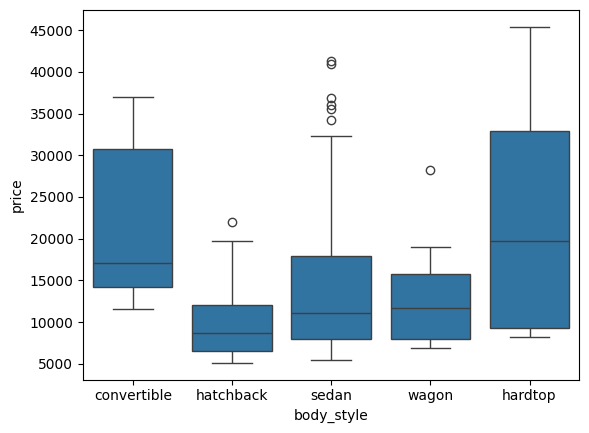

In [237]:
sns.boxplot(x = 'body_style', y = 'price', data=df)

### Grouping

In [238]:
df_group = df[['drive_wheels', 'body_style', 'price']]
df_grouped = df_group.groupby(['drive_wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive_wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


## Model Development

### Simple Linear Model

* x - The predictor (indendent variable) 
* y - The target (dependent variable)

y hat = b base 0 + b base 1 x

b base 0 =  the intercept
b base 1 = slope

In [239]:
# Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = df[['highway_mpg']]
Y = df['price']

# Train the model with single independent variable highway_mpg
lm.fit(X, Y)

# Obtain a prediction
YHat = lm.predict(X)
print("Predicted Values", YHat[0:5])

# value of intercept
print("Intercept", lm.intercept_)

# value of slope
print("Slope", lm.coef_)

Predicted Values [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
Intercept 38423.3058581574
Slope [-821.73337832]


In [240]:
# Predict with the independent variable

lm1 = LinearRegression()
X1 = df[['engine_size']]
Y1 = df[['price']]

# Train the model with single independent variable engine_size
lm1.fit(X1, Y1)

# Obtain a prediction
YHat1 = lm1.predict(X1)
print("Predicted Values", YHat1[0:5])

# value of intercept
print("Intercept", lm1.intercept_)

# value of slope
print("Slope", lm1.coef_)

Predicted Values [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]]
Intercept [-7963.33890628]
Slope [[166.86001569]]


## Multiple Linear Model

In [241]:
lm2 = LinearRegression()

Z = df[['normalized_losses', 'highway_mpg']]

# Train with Multiple independent variables 'normalized_losses', 'highway_mpg'
lm2.fit(Z, df['price'])

# Obtain a prediction
YHat2 = lm2.predict(Z)

# intercept
print(lm2.intercept_)

# slope
print(lm2.coef_)



38201.313272457264
[   1.49789586 -820.45434016]


## Model Evaluation Using Visualization

In [242]:
# import libraries
import seaborn as sns
%matplotlib inline

### Regression Plot

(0.0, 48175.989390428265)

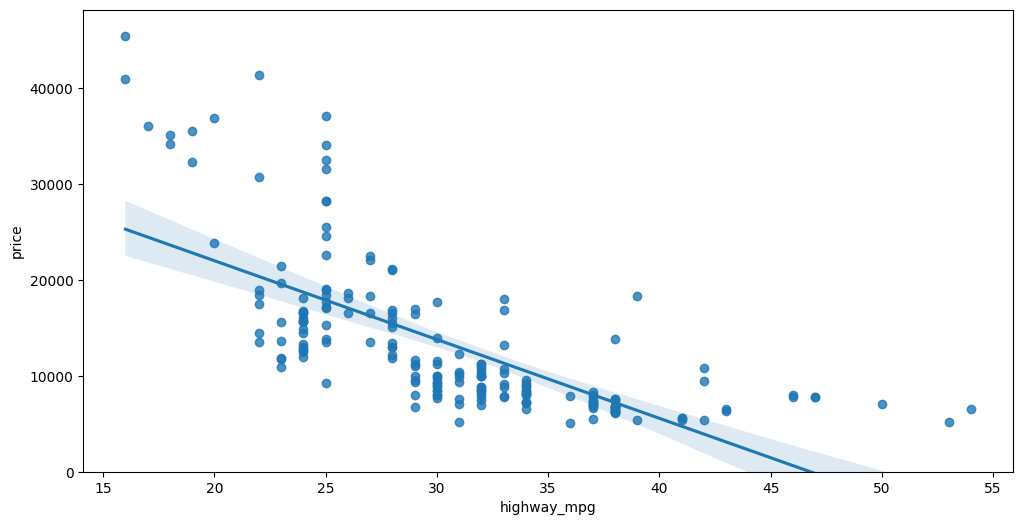

In [243]:
# Regresion Plot with Highway Mpg and Price
height = 6
width = 12
plt.figure(figsize=(width, height))
sns.regplot(x='highway_mpg', y='price', data = df)
plt.ylim(0, )

(0.0, 47414.1)

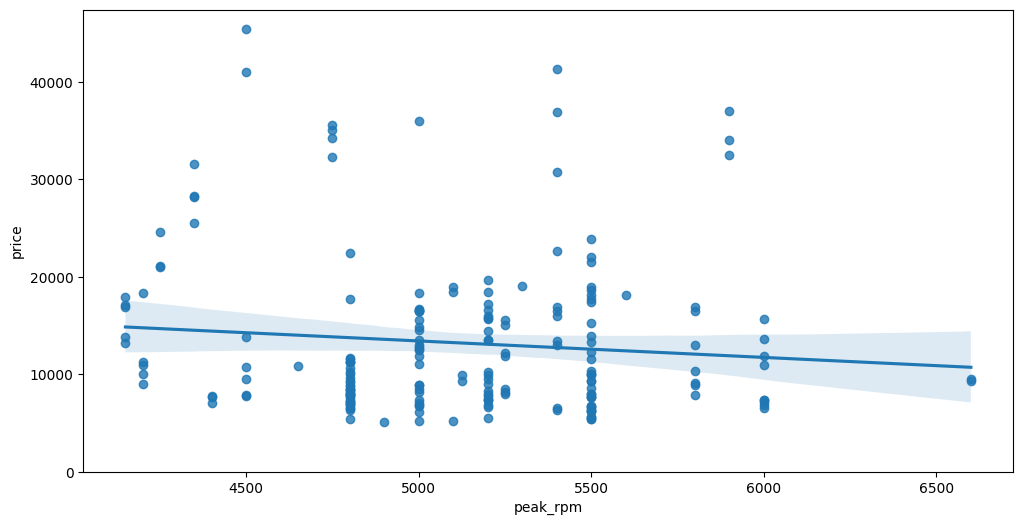

In [244]:
# Regresion Plot with Highway Mpg and Price

plt.figure(figsize=(width, height))
sns.regplot(x='peak_rpm', y='price', data = df)
plt.ylim(0, )

### Residual Plots

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

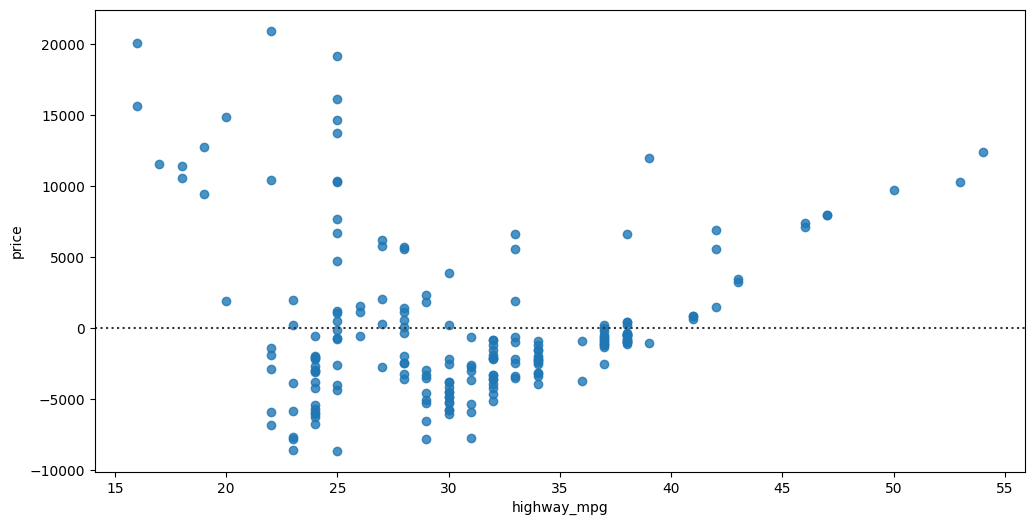

In [245]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway_mpg'], y = df['price'], data = df)
plt.show()

### Multi Linear Regression Model

This gets a bit more complicated because you can't visualize it with regression or residual plot.

### Distribution Plot

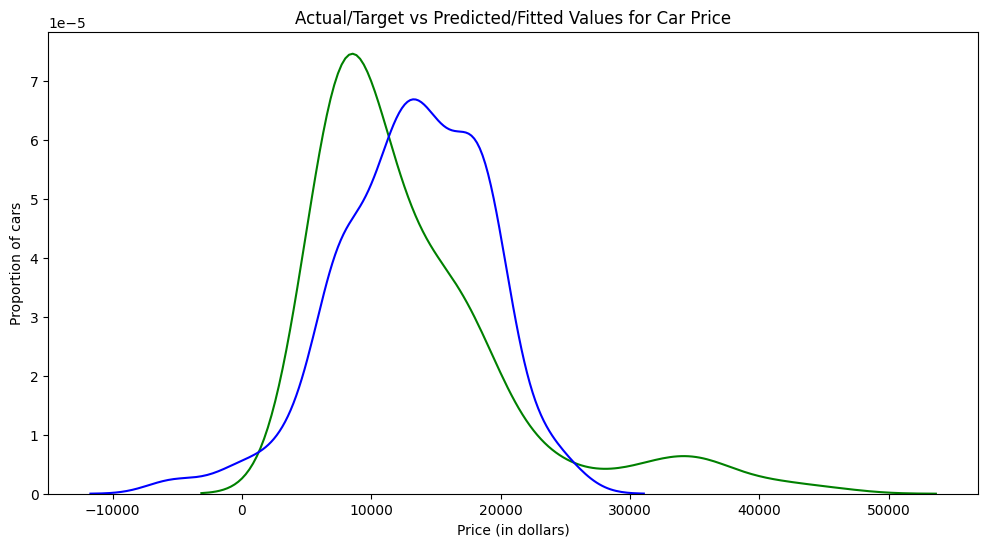

In [246]:
YHat2 = lm2.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color='g', label = 'Actual or Target Values')

sns.kdeplot(YHat2, color='b', label = 'Predicted or Fitted Values', ax= ax1)

plt.title("Actual/Target vs Predicted/Fitted Values for Car Price")
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')
plt.show()
plt.close()

### Polynomial Regression

In [247]:
from sklearn.preprocessing import PolynomialFeatures

In [248]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [249]:
Z_pr = pr.fit_transform(Z)

In [250]:
Z.shape
# With 2 Features

(201, 2)

In [251]:
Z_pr.shape
# With 6 Features

(201, 6)

### Pipeline
Data pipeline simplify the steps of processing the data. 

In [252]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [253]:
Steps = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Steps)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [254]:
# Normalize Data and Fit

pipe.fit(Z.astype(float), df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [255]:
YPipe = pipe.predict(Z)
YPipe[0:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

In [256]:
Steps = [('scale', StandardScaler()),  ('model', LinearRegression())]
pipe = Pipeline(Steps)
pipe.fit(Z, df['price'])
YPipe = pipe.predict(Z)
YPipe[0:10]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047, 17872.69806371, 17926.6223148 , 17872.69806371,
       22028.89401561, 14695.7334135 ])

### Model Evaluation

Measurements to determine the accuracy of model

* R^2 / R-Squared
    - Coefficient of Determination, is to determine how close the data is to the fitted regression line .
* Mean Squared Error (MSE)
    - Average of the squares of Errors. i.e the difference between the actual value (y) and the predicted value (ŷ - yHat)

### R^2 / R-Squared Calculation for Simple Linear Model

In [257]:
# Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = df[['highway_mpg']]
Y = df['price']

# Train the model with single independent variable highway_mpg
lm.fit(X, Y)

# Find R^2 / R-Squared
print('The R-square is ', lm.score(X, Y))

The R-square is  0.4965911884339176


### Mean Squared Error (MSE) Calculation for Simple Linear Model

In [258]:
from sklearn.metrics import mean_squared_error

# Predict price for the given highway_mpg
YHat = lm.predict(X)

# Find the mean squared error (MSE) for the actual and the predicated value
mse = mean_squared_error(Y, YHat)

print(f"The mean squared error of price and the predicted value is {mse}")

The mean squared error of price and the predicted value is 31635042.944639888


### R^2 / R-Squared Calculation for Multiple Linear Regression

In [259]:
Z = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']]

Z = Z.astype(float)

# Train the model with multiple independent variables
lm.fit(Z, Y)

# Find R^2 / R-Squared for trained multiple independent variables
print('The R-square is ', lm.score(Z, Y))


The R-square is  0.8093732522175299


### Mean Squared Error (MSE) Calculation for Multiple Linear Regression

In [260]:
# Predict price for the given highway_mpg
YHat_multi_fit = lm.predict(Z)

# Find the mean squared error (MSE) for the actual and the predicated value
mse_multi_fit = mean_squared_error(Y, YHat_multi_fit)

print(f"The mean squared error of price and the predicted value is {mse_multi_fit}")

The mean squared error of price and the predicted value is 11979300.349818882


### Training and Testing

* Split the data into train and test data sets

In [261]:
# Import library
from sklearn.model_selection import train_test_split

# Put the target data into a seperate dataframe
y_data = df['price']

# Drop price from the main dataframe
x_data = df.drop('price', axis = 1)

# test_size 0.3 tells allocate 30% of data into test, so the reset 70% of data will be allocated to train data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

print(f"Total Number of samples {x_data.shape[0]}")
print(f"Number of train samples {x_train.shape[0]}")
print(f"Number of test samples {x_test.shape[0]}")

Total Number of samples 201
Number of train samples 140
Number of test samples 61


In [262]:
# Import LinearRegression Module
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Fit the model using the feature 'horsepower'
lr.fit(x_train[['horsepower']], y_train) ## Y_train contains the target price

# Calculate R Squared on the test data
print(f"R Squared Score on the test data - {lr.score(x_test[['horsepower']], y_test)}")

# Calculate R Squared on the train data
print(f"R Squared Score on the train data - {lr.score(x_train[['horsepower']], y_train)}")

R Squared Score on the test data - 0.6288481434058781
R Squared Score on the train data - 0.6628438865902951


### Cross Validation Score

In [264]:
from sklearn.model_selection import cross_val_score

x_validation_score = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

x_validation_score

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

### Overfitting and underfitting and model selection

In [265]:
# Let's create mulitple regression model

lr.fit(x_train[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']], y_train)

LinearRegression()

#### Prediction using train data

In [266]:
yhat_train = lr.predict(x_train[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']])
yhat_train[0:5]

array([29845.97029655,  6884.00598695,  6770.39066998,  9674.24809561,
         590.61436067])

#### Prediction using test data

In [267]:
yhat_test = lr.predict(x_test[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']])
yhat_test[0:5]

array([11464.1994682 ,  5969.2785774 , 11273.98949607,  6781.31570839,
       15787.22475296])

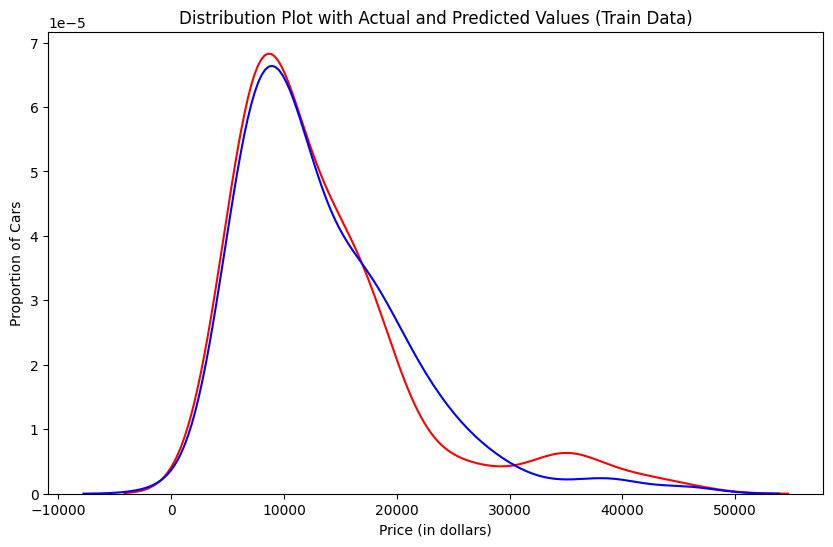

In [268]:
# Create distribution plot for Train Data
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_train, color="r", label='Actual values (Train)')
ax2 = sns.kdeplot(yhat_train, color="b", label='Predicted Values (Train)', ax=ax1)

plt.title('Distribution Plot with Actual and Predicted Values (Train Data)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()

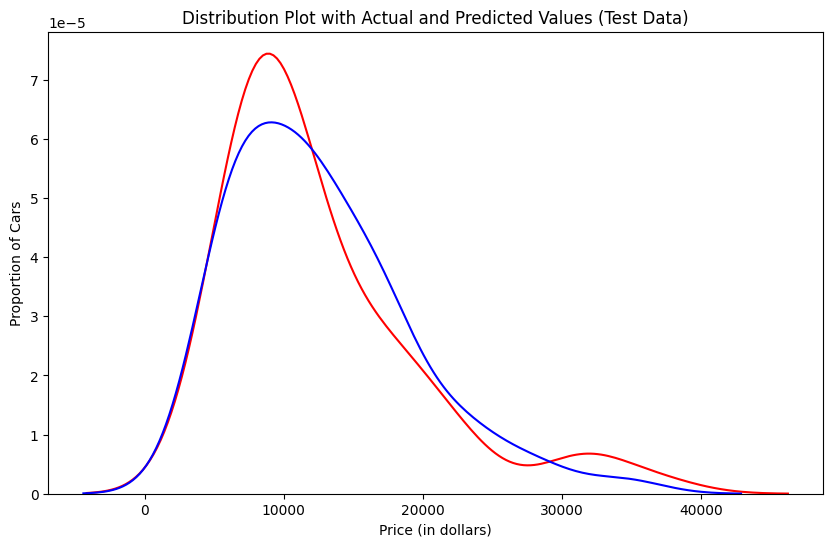

In [269]:
# Create distribution plot for Test Data
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label='Actual values (Test)')
ax2 = sns.kdeplot(yhat_test, color="b", label='Predicted Values (Test)', ax=ax1)

plt.title('Distribution Plot with Actual and Predicted Values (Test Data)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()

### Overfitting

In [270]:
## 55 percentage of data is for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [271]:
yhat = poly.predict(x_test_pr)

yhat[0:5]

array([ 6727.51257834,  7306.64421316, 12213.67426513, 18895.14450874,
       19996.96531423])